In [3]:
from matplotlib import pyplot as plt
import matplotlib.image as img
import numpy as np
import os
import array as arr
#import webcolors
import cv2

**PROBLEM 1**

**Question 1**

In [45]:
I = plt.imread("/content/drive/MyDrive/DIP_data/7.1.08.tiff")
print("array is - {}".format(I))

array is - [[133 133 131 ... 130 126 118]
 [130 123 133 ... 126 126 124]
 [124 121 121 ... 128 126 126]
 ...
 [154 156 154 ... 150 152 150]
 [152 154 154 ... 154 154 156]
 [154 156 154 ... 154 147 145]]


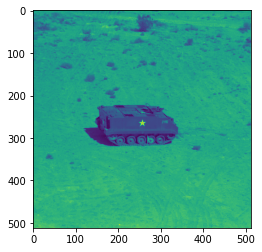

In [46]:
plt.imshow(I)

**Question 2**

In [47]:
##First looking at the shape of the picture taken -
np.shape(I)
I_r = np.shape(I)[0]
I_c = np.shape(I)[0]
## Finding the minimum and maximum pixel values -
pmin = np.min(I)
pmax = np.max(I)
print("The maximum pixel value is {} and the minimum pixel value is {} for the image taken".format(pmax,pmin))
resolution = I_r*I_c
print("the resolution is {}".format(resolution))

The maximum pixel value is 215 and the minimum pixel value is 12 for the image taken
the resolution is 262144


**Question 3**

In [5]:
## compression
im_size = os.path.getsize("/content/drive/MyDrive/DIP_data/7.1.08.tiff")
ratio = im_size/262144
print("The compression ratio is {}".format(ratio)) 

The compression ratio is 1.0005111694335938


**Question 4**

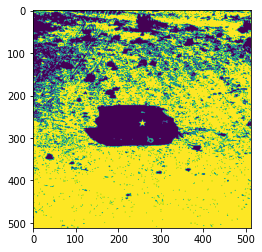

In [51]:
##function to show bit plane images 
## Here the assumed bit plane for the original image is taken to be 8 (as per gray scale image)
def bit_plane_image(pic, b_plane):
    I = plt.imread(pic)
    lst = []
    for i in range(np.shape(I)[0]):
        for j in range(np.shape(I)[1]):
            lst.append(np.binary_repr(I[i][j], width = 8))
    
    bit_plane = np.array([int(lst[k][7 - b_plane]) for k in range(len(lst))]).reshape(I_r,I_c)    

    bit_plane_image = plt.imshow(bit_plane)
    
    return bit_plane_image

bit_plane_image("/content/drive/MyDrive/DIP_data/7.1.08.tiff", 7)

**Question 5**

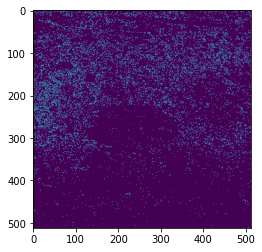

In [52]:
## function to show the quantized image
def quantization(img,level):
      
    quant_levels = []
    mid_vals = []
    #c = 0
    values = np.arange(0,256,1)
    width = int(256/(2**level)) ##level is the quantization level

    for i in range(0,256,width):
        quant_levels.append([i,i+width])
        mid_val = (i + (i+width))/2 
        mid_vals.append(int(np.round(mid_val))) ##mid_vals contains the midvalues(levels) for the pixel ranges to be mapped to 
        
    im = plt.imread(img)
    im_2 = np.zeros((np.shape(im)[0],np.shape(im)[1]))
    for i in range(np.shape(im)[0]):
        for j in range(np.shape(im)[1]):
            for k in range(len(quant_levels)):
                if im[i][j] in quant_levels[k]:
                    im_2[i][j] = mid_vals[k]
                    #c = c+1
    plt.imshow(im_2)
    
quantization("/content/drive/MyDrive/DIP_data/7.1.08.tiff",2)

**PROBLEM 2**

**Question 1**

the red channel is  AxesImage(54,36;334.8x217.44)
the green channel is  AxesImage(54,36;334.8x217.44)
the blue channel is  AxesImage(54,36;334.8x217.44)


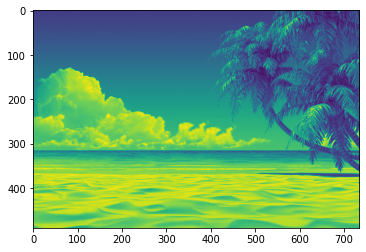

In [54]:
##function to read RGB channels and convert it to gray scale
def im_func(img):
    
    im = plt.imread(img)
    im_r = im[:,:,0] #red plane
    im_g = im[:,:,1] #green plane
    im_b = im[:,:,2] #blue plane

    gray_image = (0.2989 * im_r + 0.5870 * im_g + 0.1140 * im_b) ##relation to convert RGB to gray scale 
    
    print("the red channel is ", plt.imshow(im_r))
    print("the green channel is ", plt.imshow(im_g))
    print("the blue channel is ", plt.imshow(im_b))
    
    return plt.imshow(gray_image)


im_func("/content/drive/MyDrive/DIP_data/bg1.jpg")


**Question 2**

In [ ]:
##function to take and image and find the most frequent color
def frequent(img):
    
    im = plt.imread(img)
    im_r = im[:,:,0]
    im_g = im[:,:,1]
    im_b = im[:,:,2]
    
    red_pel = im_r.flatten()  #flattening the array
    lst_r = []
    arr_r = arr.array('i',red_pel) #converting to an array

    values, counts = np.unique(arr_r, return_counts=True)
    dict_r = {}
    for A, B in zip(values, counts):
        dict_r[A] = B

    lst_r = list(dict_r.values())
    lst_r.sort(reverse=True)
    #print(lst_r[0])
    for k, v in dict_r.items():
        if v == lst_r[0]:
            max_red = k
            
    green_pel = im_g.flatten()  #flattening the array
    lst_g = []
    arr_g = arr.array('i',green_pel) #converting to an array
    values, counts = np.unique(arr_g, return_counts=True)
    dict_g = {}
    for A, B in zip(values, counts):
        dict_g[A] = B

    lst_g = list(dict_g.values())
    lst_g.sort(reverse=True)
    #print(lst_g[0])

    for k, v in dict_g.items():
        if v == lst_g[0]:
            max_green = k
            
    blue_pel = im_b.flatten()  #flattening the array
    lst_b = []
    arr_b = arr.array('i',blue_pel) #converting to an array
    values, counts = np.unique(arr_b, return_counts=True)
    dict_b = {}
    for A, B in zip(values, counts):
        dict_b[A] = B


    lst_b = list(dict_b.values())
    lst_b.sort(reverse=True)

    dict_b   
    #print(lst_b[0])
    for k, v in dict_b.items():
        if v == lst_b[0]:
            max_blue = k
            
    return (max_red,max_green,max_blue)

    print("The most frequent color is ({},{},{})".format(max_red,max_green,max_blue))


frequent("/content/drive/MyDrive/DIP_data/fg.jpg")


(21, 255, 8)

**Question 3**

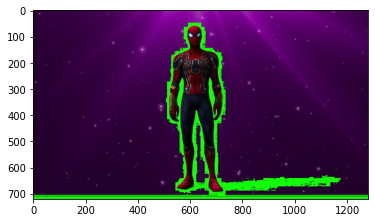

In [ ]:
##function to change background
##run this function after running question 2

def back_change(img1,img2):
    
    im = plt.imread(img1)
    img_copy = im.copy()
    im_2 = plt.imread(img2)
    im_3 = np.zeros((np.shape(im)[0],np.shape(im)[1],np.shape(im)[2]), dtype = int)

    (r,g,b) = frequent(img1) ## frequent function is from question 2 (previous question to this)

    for i in range(np.shape(im)[0]):
        for j in range(np.shape(im)[1]):
            if ((im[i][j][0] == r) and (im[i][j][1] == g) and (im[i][j][2] == b)):
                img_copy[i][j][0] = im_2[i][j][0]
                img_copy[i][j][1] = im_2[i][j][1]
                img_copy[i][j][2] = im_2[i][j][2] 
            
    return plt.imshow(img_copy)


back_change("/content/drive/MyDrive/DIP_data/fg.jpg","/content/drive/MyDrive/DIP_data/bg.jpg")

**PROBLEM 3**

**Question 1**

In [ ]:
from google.colab.patches import cv2_imshow

In [53]:
##Function to read a mp4 file and print frames

def video(vid):
  video_cap = cv2.VideoCapture(vid)
  fps = video_cap.get(cv2.CAP_PROP_FPS)
  print("Frame rate", int(fps), "FPS")
  cap = cv2.VideoCapture(vid)
    
  # Check if camera opened successfully
  if (cap.isOpened()== False):
    print("Error opening video stream or file")
  try:
        
      # creating a folder named data
      if not os.path.exists('data'):
          os.makedirs('data')
  except OSError:
      print ('Error: Creating directory of data')
  # Read until video is completed
  currentframe = 0
  while (cap.isOpened()):
      # Capture frame-by-frame
      ret, frame = cap.read()
      if ret == True:
  
          # Display the frame
          cv2_imshow(frame)
          name = './data/frame' + str(currentframe) + '.jpg'
          print ('Creating...' + name)
    
          # increasing counter so that it will show how many frames are created
          currentframe += 1
  
          # Press Q on keyboard to  exit
          if cv2.waitKey(25) & 0xFF == ord('q'):
              break
      else:
          break
  
  # When everything done, release the video capture object
  cap.release()
  
  # Closes all the frames
  cv2.destroyAllWindows()

video("/content/drive/MyDrive/DIP_data/butterfly.mp4")

NameError: ignored

**Question 2** 

In [ ]:
###To run this code first a folder of the frames are created according to the video given in the file path named
###filepath_1. Then the frames are written in the folder named 'filepath_2{}', from this folder the images are taken
###and quantization_2 function is applied. The returned images should be written in another folder names filepath_3{}.jpg
###Now for generating the video take the filepath_3 and place it in the image_folder variable
###Name the video in place of video_name.avi and save it in filepath_4

cap = cv2.VideoCapture("filepath_1")
 
# Check if camera opened successfully
if (cap.isOpened()== False):
  print("Error opening video stream or file")
try:
      
    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')
except OSError:
    print ('Error: Creating directory of data')
# Read until video is completed
currentframe = 0
while (cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
 
        # Display the resulting fram
        cv2.imshow('Frame', frame)
        name = './data/frame' + str(currentframe) + '.jpg'

        cv2.imwrite("filepath_2{}".format(name), frame)
        currentframe += 1
        if cv2.waitKey(29) & 0xFF == ord('q'):
            break
 
    # Break the loop
    else:
        break 
        
# When everything done, release the video capture object
cap.release() 
# Closes all the frames
cv2.destroyAllWindows()

def quantization_2(image, level):
    
    quant_levels = []
    mid_vals = []
    #c = 0
    values = np.arange(0,256,1)
    width = int(256/(2**level))

    for i in range(0,256,width):
        quant_levels.append([i,i+width])
        mid_val = (i + (i+width))/2 
        mid_vals.append(int(np.round(mid_val)))
    
    im_2 = np.zeros((np.shape(image)[0],np.shape(image)[1]))
    for i in range(np.shape(image)[0]):
        for j in range(np.shape(image)[1]):
            for k in range(len(quant_levels)):
                if image[i][j] in quant_levels[k]:
                    im_2[i][j] = mid_vals[k]
                    #c = c+1
    #plt.imshow(im_2)
    return im_2

for i in range(currentframe):
    img = plt.imread("filepath_2{}.jpg".format(i))

    img[:,:,0] = quantization_2(img[:,:,0],2)
    img[:,:,1] = quantization_2(img[:,:,1],2)
    img[:,:,2] = quantization_2(img[:,:,2],2)
    
    cv2.imwrite("filepath_3{}.jpg".format(i),img)

def generate_video():
    image_folder = 'filepath_3' # make sure to use your folder
    video_name = 'video_name.avi'
    os.chdir("filepath_4")
      
    images = [img for img in os.listdir(image_folder)
              if img.endswith(".jpg") ]
    print(images) 
  
    frame = cv2.imread(os.path.join(image_folder, images[0]))

    height, width, layers = frame.shape  
  
    video = cv2.VideoWriter(video_name, 0, 1, (width, height)) 
  
    # Appending the images to the video one by one
    for image in images: 
        video.write(cv2.imread(os.path.join(image_folder, image))) 

    cv2.destroyAllWindows() 
    video.release()  
  
  
# Calling the generate_video function
generate_video()